### 4.1 回到基础
#### 赋值
#### 等式
#### 条件语句

In [1]:
# all()函数和any()函数可以应用到一个链表（或其他序列），
# 来检查是否全部或任一项 目满足一些条件：
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [2]:
any(len(w) > 4 for w in sent)

True

### 4.2 序列

#### 序列类型上的操作
![list4-1](./imgs/list4-1.jpg)

In [5]:
import nltk
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = nltk.word_tokenize(raw)
fdist = nltk.FreqDist(text)
list(fdist)

['Red', 'lorry', ',', 'yellow', 'red', '.']

In [6]:
for key in fdist:
    print(fdist[key])

1
4
3
2
1
1


In [7]:
# 在接下来的例子中，我们使用元组重新安排我们的链表中的内容。
# 可以省略括号，因为逗号比赋值的优先级更高。
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

In [14]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [11]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [12]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [13]:
len(training_data) / len(test_data)

9.0

#### 合并不同类型的序列

In [15]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [16]:
# 我们经常使用一个元组来保存一个纪录：与一些实体相关的不同字段的集合
lexicon = [ #词汇条目 #拼写形式、词性、发音
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]

In [17]:
lexicon

[('turned', 'VBD', ['t3:nd', 't3`nd'])]

In [18]:
lexicon = tuple(lexicon)

In [19]:
lexicon

(('turned', 'VBD', ['t3:nd', 't3`nd']),)

#### 产生器表达式

In [21]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in nltk.word_tokenize(text)]
# 链表对象的存储空间必须在max()的值被计算之前分配
max([w.lower() for w in nltk.word_tokenize(text)])

'word'

In [22]:
# 产生器表达式
# 数据流向调用它的函数。
# 由于调用的函数只是简单的要找最大值——按字典顺序排在最后的词——
# 它可以处理数据流，而无需存储迄今为止的最大值以外的任何值。
max(w.lower() for w in nltk.word_tokenize(text))

'word'

### 4.3 风格的问题

#### Python 代码风格
#### 过程风格与声明风格
#### 计数器的一些合理用途

In [23]:
# 使用一个循环变量中提取链表中连续重叠的 n-grams：
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent) - n + 1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

确保循环变量范围的正确相当棘手的。因为这是 NLP 中的常见操作，NLTK提供了支
持函数`bigrams(text)`、`trigrams(text)`和一个更通用的`ngrams(text, n)`。

下面是我们如何使用循环变量构建多维结构的一个例子。例如：建立一个 m 行n 列的 数组，其中每个元素是一个集合，我们可以使用一个嵌套的链表推导

In [24]:
from pprint import pprint


m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [25]:
# 请注意，由于我们前面所讨论的有关对象复制的原因，使用乘法做这项工作是不正确的。
array = [[set()] * n] * m
array[2][5].add(7)
pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


### 4.4 函数：结构化编程的基础

#### 累计函数

In [26]:
# 例4-5. 累计输出到一个链表
def search1(substring, words):
    results = []
    for word in words:
        if substring in word:
            results.append(word)
    return results

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

print("search1:")
for item in search1('zz', nltk.corpus.brown.words()):
    print(item)

print("search2:")
for item in search2('zz', nltk.corpus.brown.words()):
    print(item)

search1:
Grizzlies'
fizzled
Rizzuto
huzzahs
dazzler
jazz
Pezza
Pezza
Pezza
embezzling
embezzlement
pizza
jazz
Ozzie
nozzle
drizzly
puzzle
puzzle
dazzling
Sizzling
guzzle
puzzles
dazzling
jazz
jazz
Jazz
jazz
Jazz
jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
dizzy
jazz
Jazz
puzzler
jazz
jazzmen
jazz
jazz
Jazz
Jazz
Jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
Jazz
Jazz
jazz
jazz
nozzles
nozzle
puzzle
buzz
puzzle
blizzard
blizzard
sizzling
puzzled
puzzle
puzzle
muzzle
muzzle
muezzin
blizzard
Neo-Jazz
jazz
muzzle
piazzas
puzzles
puzzles
embezzle
buzzed
snazzy
buzzes
puzzled
puzzled
muzzle
whizzing
jazz
Belshazzar
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie's
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
blizzard
blizzards
blizzard
blizzard
fuzzy
Lazzeri
Piazza
piazza
palazzi
Piazza
Piazza
Palazzo
Palazzo
Palazzo
Piazza
Piazza
Palazzo
palazzo
palazzo
Palazzo
Palazzo
Piazza
piazza
piazza
piazza
Piazza
Piazza
Palazzo
palazzo
Pia

函数`search2()`是一个产生器。第一次调用此函数，它运行到 `yield` 语句然后停下来。 调用程序获得第一个词，没有任何必要的处理。一旦调用程序对另一个词做好准备，函数会从停下来的地方继续执行，直到再次遇到 `yield` 语句。这种方法通常更有效，因为函数只产生调用程序需要的数据，并不需要分配额外的内存来存储输出（参见前面关于产生器表达式的讨论）。

下面是一个更复杂的产生器的例子，产生一个词链表的所有排列。为了强制 `permutations()`函数产生所有它的输出，我们将它包装在list() ``调用中。

In [27]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm) + 1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

#### 高阶函数

Python提供了一些具有函数式编程语言标准特征的高阶函数，如：`Haskell`。我们将在这里演示它们，与使用链表推导的相对应的表达一起。

让我们从定义一个函数 `is_content_word()`开始，它检查一个词是否来自一个开放的实词类。使用此函数作为 `offilter()`的第一个参数，它对作为它的第二个参数的序列中的每个项目运用该函数，只保留该函数返回`True`的项目。

In [29]:
def is_content_word(word):
    return word.lower() not in ['a' 'of', 'the', 'and', 'will', ',','.']

sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

list(filter(is_content_word, sent))

['Take', 'care', 'of', 'sense', 'sounds', 'take', 'care', 'of', 'themselves']

In [31]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'of', 'sense', 'sounds', 'take', 'care', 'of', 'themselves']

另一个高阶函数是`map()`，将一个函数运用到一个序列中的每一项。它是我们在本节早先看到的函数 `extract_property()`的一个通用版本。这里是一个简单的方法找出布朗语 料库新闻部分中的句子的平均长度，后面跟着的是使用链表推导计算的等效版本：

In [34]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [36]:
lengths = [len(w) for w in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

在上面的例子中，我们指定了一个用户定义的函数 `is_content_word()`和一个内置函
数 `len()`。我们还可以提供一个 `lambda` 表达式。这里是两个等效的例子，计数每个词中的元音的数量。

In [38]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [39]:
[len([c for c in w if c.lower() in "aeiou"]) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

### 4.6 程序开发

#### Python 模块的结构

你可以使用变量`__file__`定位你的系统中任一NLTK 模块的代码：`nltk.metrics.__file__`。

模块的一些变量和函数仅用于**模块内部**。它们的名字应该以下划线开头，如`_helper()`，因为**这将隐藏名称**。如果另一个模块使用习惯用法：**`from modul e import *` 导入这个模块，这些名称将不会被导入**。你可以选择性的列出一个模块的外部可访问的名称，使用像这样的一个特殊的内置变量:
`__all__ = ['edit_distance', 'jaccard_distance']`


#### 调试技术

Python 提供了一个调试器，它允许你监视程序的执行，指定程序暂停运行的行号（即
断点），逐步调试代码段和检查变量的值。你可以如下方式在你的代码中调用调试器：
```python
import pdb
import mymodule
pdb.run('mymodule.myfuction()')
```
它会给出一个提示(`Pdb`)，你可以在那里输入指令给调试器。输入 `help` 来查看命令的
完整列表。输入`step(或只输入s)`将执行当前行然后停止。如果当前行调用一个函数，它将进入这个函数并停止在第一行。输入`next(或只输入n)`是类似的，但它会在当前函数中的下一行停止执行。`break（或b）`命令可用于创建或列出断点。输入 `continue（或c）`会继续执行直到遇到下一个断点。输入任何变量的名称可以检查它的值。



### 4.7 算法设计

分治：我们解决一个大小为`n`的问题通过将其分成两个大小为`n/2`的问题，解决这些问题，组合它们的结果成为原问题的结果。
#### 递归
让我们用递归来构建一个深嵌套的对象。一个字母查找树（`letter trie`）是一种可以用来索引词汇的数据结构，一次一个字母。（根据词检索 `word retrieval` 而得名）。例如：如果 `trie` 包含一个字母的查找树，那么 `trie['c']`是一个较小的查找树包含所有以`c`开头的词。例 4-6 演示使用Python字典（5.3节）构建查找树的递归过程。插入 词`chien`（狗的法语），我们将`c`分类，递归的掺入 `hien` 到 trie['c']的子查找树中。递归继续直到词中没有剩余的字母，于是我们存储的了预期值（本例中是词chien）。

In [44]:
# 例4-6. 构建一个字母查找树：一个递归函数建立一个嵌套的字典结构，
# 每一级嵌套包含给定前缀的所有单词，子查找树含有所有可能的后续词。
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [45]:
trie = nltk.defaultdict(dict)
trie

defaultdict(dict, {})

In [46]:
insert(trie, 'chat', 'cat')

In [47]:
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie) ## for nicer printing

In [48]:
trie['c']['h']['a']['t']['value']

'cat'

In [49]:
pprint(trie)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'}, 'e': {'n': {'value': 'dog'}}}}}}


#### 权衡空间与时间

我们有时可以显著的加快程序的执行，通过建设一个辅助的数据结构，例如：索引。例
4-7实现一个简单的电影评论语料库的全文检索系统。通过索引文档集合，它提供更快的查 找。

In [50]:
# 例4-7. 一个简单的全文检索系统
import re
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents) #匹配任意字符到下一个符合条件的字符
    contents = re.sub('\s+', ' ', contents) # any space
    return contents

def snippet(doc, term): # buggy
    text = ' ' * 30 + raw(doc) + ' ' * 30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())
query = ''
while query != 'quit':
    query = raw_input("query")
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")


Building Index...


TypeError: expected str, bytes or os.PathLike object, not ZipFilePathPointer

一个更微妙的空间与时间折中的例子涉**及使用整数标识符替换一个语料库的标识符**。我们为语料库创建一个词汇表，每个词都被存储一次的链表，然后转化这个链表以便我们能通 过查找任意词来找到它的标识符。每个文档都进行预处理，使一个词链表变成一个整数链表。 现在所有的语言模型都可以使用整数。见例 4-8中的如何为一个已标注的语料库做这个的例子的列表:

In [51]:
# 例4-8. 预处理已标注的语料库数据，将所有的词和标注转换成整数
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

空间时间权衡的另一个例子是维**护一个词汇表**。如果你需要处理一段输入文本检查所有的词是否在现有的词汇表中，**词汇表应存储为一个集合**，而不是一个链表。集合中的元素会自动索引，所以测试一个大的集合的成员将远远快于测试相应的链表的成员。我们可以使用 `timeit` 模块测试这种说法。`Timer` 类有两个参数：一个是多次执行的语
句，一个是只在开始执行一次的设置代码。我们将分别使用一个整数的链表和一个整数的集合模拟 10万个项目的词汇表。测试语句将产生一个随机项，它有50％的机会在词汇表中。

In [63]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size
setup_set = "import random; vocab = set(range(%d))" % vocab_size
statement = "\nrandom.randint(0, %d) in vocab" % vocab_size * 2

In [64]:
Timer(statement, setup_list).timeit(1000)

0.0022080999915488064

In [65]:
Timer(statement, setup_set).timeit(1000)

0.0021704999962821603

#### 动态规划
动态规划（`Dynamic programming`）是一种自然语言处理中被广泛使用的算法设计的一
般方法。

动态规划用于解决包含多个**重叠的子问题**的问题。不是反复计算这些子问题，而是简单的将它们的计算结果存储在一个查找表中。

在本节的余下部分，我们将介绍动态规划，但在一个相当不同的背景：句法分析，下介绍。

Pingala 是大约生活在公元前5世纪的印度作家，作品有被称为《Chandas Shastra》的梵文韵律专著。Virahanka 大约在公元6世纪延续了这项工作，研究短音节和长音节组合产生一个长度为n的旋律的组合数。短音节，标记为`S`，占一个长度单位，而长音节，标记为 `L`，占2个长度单位。Pingala 发现，例如：有5种方式构造一个长度为4的旋律：`V4 = {L L, SSL, SLS, LSS, SSSS}`。请看，我们可以将`V4`分成两个子集，以 `L` 开始的子集和以`S` 开始的子集，如（1）所示。

```
(1) V4 = 
    LL, LSS 
        i.e. L prefixed to each item of V2 = {L, SS}
    SSL, SLS, SSSS 
        i.e. S prefixed to each item of V3 = {SL, LS, SSS}
```

有了这个观察结果，我们可以写一个小的递归函数称为`virahanka1()`来计算这些旋
律，如例 4-9 所示。请注意，要计算`V4`，我们先要计算`V3`和 `V`2。但要计算 `V3`，我们先要计算`V2`和 `V1`。在（2）中描述了这种调用结构。

![v4](./imgs/v4.jpg)


In [68]:
# 例4-9. 四种方法计算梵文旋律：
# （一）迭代；（二）自底向上的动态规划；
# （三）自上而下的动态规划；（四）内置默记法。
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n - 1)]
        l = ["L" + prosody for prosody in virahanka1(n - 2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i + 1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n - 1)]
        l = ["L" + prosody for prosody in virahanka3(n - 2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n - 1)]
        l = ["L" + prosody for prosody in virahanka4(n - 2)]
        return s + l

In [69]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [70]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [71]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [72]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

请注意，`virahanka2()`所采取的办法是解决较大问题前先解决较小的问题。因此，这
被称为自下而上的方法进行动态规划。不幸的是，对于某些应用它还是相当浪费资源的，因 为它计算的一些子问题在解决主问题时可能并不需要。采用自上而下的方法进行动态规划可 避免这种计算的浪费，如例 4-9中函数`virahanka3()`所示。不同于自下而上的方法，这种 方法是递归的。通过检查是否先前已存储了结果，它避免了 `virahanka1()`的巨大浪费。如 果没有存储，就递归的计算结果，并将结果存储在表中。最后一步返回存储的结果。最后一 种方法，`invirahanka4()`，使用一个Python的“装饰器”称为默记法（`memoize`），它会 做`virahanka3()`所做的繁琐的工作而不会搞乱程序。这种“默记”过程中会存储每次函数 调用的结果以及使用到的参数。如果随后的函数调用了同样的参数，它会返回存储的结果， 而不是重新计算。（这方面的Python语法超出了本书的范围。）

### 4.8 Python 库的样例

#### Matplotlib 绘图工具

我们一直专注文字介绍和使用格式化输出语句按列得到输出。以图形的形 式显示数值数据往往是非常有用的，因为这往往更容易检测到模式。例如：在例 3-5 中，我 们看到一个数字的表格，显示按类别划分的布朗语料库中的特殊情态动词的频率。例 4-10 中的程序以图形格式展示同样的信息。输出显示在图 4-4（一个图形显示的彩色图）

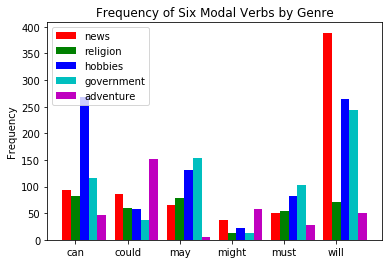

In [73]:
# 例4-10. 布朗语料库中不同部分的情态动词频率
colors = 'rgbcmyk'  #red, green, blue, cyan, magenta, yellow, black
def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    import pylab
    ind = pylab.arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pylab.bar(ind + c * width, counts[categories[c]], width,
                            color = colors[c % len(colors)])
        bar_groups.append(bars)
    pylab.xticks(ind + width, words)
    pylab.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pylab.ylabel('Frequency')
    pylab.title('Frequency of Six Modal Verbs by Genre')
    pylab.show()

genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in modals
)
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

从该柱状图可以立即看出`may` 和 `must` 有几乎相同的相对频率。`could` 和`might` 也一样。 也可以**动态的产生**这些数据的可视化图形。例如：**一个使用表单输入的网页可以允许访问者指定搜索参数，提交表单，看到一个动态生成的可视化图形**。要做到这一点，我们必须为`matplotlib`指定 `Agg`后台，它是一个产生栅格（像素）图像的库。下一步，我们像以前一样使用相同的`PyLab` 方法，但不是用`pylab.show()`显示结果在图形终端，而是使用`pylab.savefig()`把它保存到一个文件。我们指定文件名和 `dpi`，然后输出一些指示网页浏览器来加载该文件的HTML标记。

In [75]:
import matplotlib
import pylab
matplotlib.use('Agg')
pylab.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

#### `NetworkX`

`NetworkX`包定义和操作被称为图的由节点和边组成的结构。它可以从 `https://networkx.lanl.gov/` 得到。`NetworkX`可以和 `Matplotlib` 结合使用可视化如`WordNet` 的网络结构（语义网络，我们在 2.5节介绍过）。例 4-11中的程序初始化一个空的图，然后遍历`WordNet` 上位词层次为图添加边。请注意，遍历是递归的，使用在 4.7节讨论的编程技术。结果显示 如图 4-5 所示。

f:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


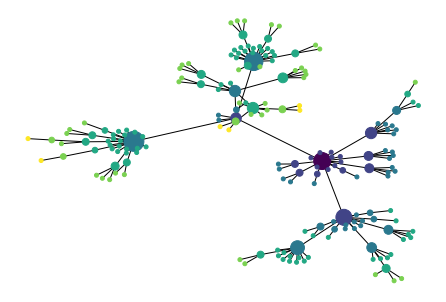

In [77]:
# 例4-11. 使用NetworkX和Matplotlib库。
from turtle import st
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
        node_size = [16 * graph.degree(n) for n in graph],
        node_color = [graph.depth[n] for n in graph],
        with_labels = False
    )
    matplotlib.pyplot.show()

dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

### `CSV`

语言分析工作往往涉及数据统计表，包括有关词项的信息、试验研究的参与者名单或从语料库提取的语言特征。这里有一个`CSV`（Comma-separated values，逗号分隔型取值格式） 格式的简单的词典片段：

我们可以使用 Python的CSV 库读写这种格式存储的文件。例如：我们可以打开一个叫
做 `lexicon.csv`的 CSV 文件，并遍历它的行。

每一行是一个字符串列表。如果字段包含有数值数据，它们将作为字符串出现，所以都
必须使用 `int()`或 `float()`转换。

In [79]:
import csv
input_file = open("lexicon.csv", "r")
for row in csv.reader(input_file):
    print(row)

['sleep', ' sli:p', ' v.i', ' a condition of body and mind ... ']
['walk', ' wo:k', ' v.intr', ' progress by lifting and setting down each foot ... ']
['wake', ' weik', ' intrans', ' cease to sleep']


### NumPy

`NumPy` 包（基本的数值运算包）对 Python 中的数值处理提供了大量的支持。`NumPy` 有一个多维数组对象，它可以很容易初始化和访问：

In [80]:
from numpy import array
cube = array([[[0,0,0], [1,1,1], [2,2,2]], 
[[3,3,3], [4,4,4], [5,5,5]], 
[[6,6,6], [7,7,7], [8,8,8]] ])

In [81]:
cube[1, 1, 1]

4

In [82]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [83]:
cube[2, 1:]

array([[7, 7, 7],
       [8, 8, 8]])

`NumPy` 包括线性代数函数。在这里我们进行矩阵的奇异值分解，潜在语义分析中使用的操作，它能帮助识别一个文档集合中的隐含概念。

In [84]:
from numpy import linalg
a = array([[4, 0], [3, -5]])
u, s, vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [85]:
s

array([6.32455532, 3.16227766])

In [86]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

NLTK中的聚类包 `nltk.cluster` 中广泛使用`NumPy` 数组，支持包括 `k-means` 聚类、高斯EM聚类、组平均凝聚聚类以及聚类分析图。有关详细信息，请输入 `help(nltk.cluster)`。

In [87]:
help(nltk.cluster)

Help on package nltk.cluster in nltk:

NAME
    nltk.cluster

DESCRIPTION
    This module contains a number of basic clustering algorithms. Clustering
    describes the task of discovering groups of similar items with a large
    collection. It is also describe as unsupervised machine learning, as the data
    from which it learns is unannotated with class information, as is the case for
    supervised learning.  Annotated data is difficult and expensive to obtain in
    the quantities required for the majority of supervised learning algorithms.
    This problem, the knowledge acquisition bottleneck, is common to most natural
    language processing tasks, thus fueling the need for quality unsupervised
    approaches.
    
    This module contains a k-means clusterer, E-M clusterer and a group average
    agglomerative clusterer (GAAC). All these clusterers involve finding good
    cluster groupings for a set of vectors in multi-dimensional space.
    
    The K-means clusterer starts 

#### 其他 Python 库
还有许多其他的 Python库，你可以使用 `http://pypi.python.org/` 处的Python包索引找到它们。许多库提供了外部软件接口，例如：关系数据库（如：`mysql-python`）和大数据集合 （如 `PyLucene`）。许多其他库能访问各种文件格式，如 `PDF`、`MSWord`和 `XML`（`pypdf`， `pywin32`，`xml.etree`）、`RSS` 源（如 `feedparser`）以及电子邮箱（如 `imaplib`，`email`）。


### 4.9 小结

- Python 赋值和参数传递使用对象引用
- `is` 操作测试是否两个对象是相同的内部对象，而`==`测试是否两个对象是相等的。两者的区别和标识符与类型的区别相似。
- 我们可以通过以写方式打开文件来写入文本到一个文件：`ofile = open('output.txt', 'w')`，然后加入内容到文件：`ofile.write("Monty Python")`，最后关闭文件`ofile.close()`
- 动态规划是一种在 NLP 中广泛使用的算法设计技术，它存储以前的计算结果，以避免不必要的重复计算